**Data Cleaning Process - Bank Client Attributes and Marketing Outcomes**

The **Bank Client Attributes and Marketing Outcomes** dataset offers a comprehensive insight into the attributes of bank clients and the outcomes of marketing campaigns. It includes details such as client demographics, employment status, financial history, and contact methods. Additionally, the dataset encompasses the results of marketing campaigns, including the duration, success rates, and previous interactions with clients. This dataset serves as a valuable resource for analyzing customer behavior, optimizing marketing strategies, and enhancing client engagement in the banking sector.

In our dataset we can find:

* 18 columns 
* 45211 rows

Each row represents a person that has been contacted by a marketing company. Each person has 16 features associated to their personal information and 1 categorical if the person is interested in adquiring the producty. 

The 17 columns are:
1. ID (numeric)
2. Age (numeric)
3. Job ( "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
4. Marital ("single", "married", "divorced")
5. Education ("unknown", "secondary", "primary", "tertiary")
6. Default (If left to pay its obligation: "yes", "no")
7. Balance (Last Years' Income-Outcome: numeric)
8. Housing (Do you have a mortgage credit?: "yes", "no")
9. Loan (Do you have a loans?: "yes", "no")
10. Contact ("unknown", "telephone", "cellular")
11. Day (The last day that the person was contacted: numeric)
12. Month (The last month that the person was contacted: numeric)
13. Duration (Duration (in seconds) of the last contact: numeric)
14. Campaign (Total number of times the person was contacted during the campaign: numeric)
15. Pdays (Number of days elapsed after the person was contacted before the actual campaign: -1: not contacted before)
16. Previous (Number of times that the person had being contacted before this campaign: numeric)
17. Poutcome (Result of the marketing campaign: "unknown", "other", "failure", "success")
18. Y (Did the client subscribe to the product?: "yes", "no")

**Data Set Introduction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/tomas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
path = 'Assignment-2_Data.csv'
data = pd.read_csv(path)

In [3]:
print(data.shape) 
data.head()

(45211, 18)


,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45211 non-null  int64  
 1   age        45199 non-null  float64
 2   job        45210 non-null  object 
 3   marital    45211 non-null  object 
 4   education  45211 non-null  object 
 5   default    45211 non-null  object 
 6   balance    45208 non-null  float64
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45211 non-null  object 
 12  duration   45211 non-null  int64  
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  y          45211 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.2+ MB


**Data Set Clean Up**

After checking our dataset, we have to check for some occurences:

1. Missing data in some rows/columns
2. Irrelevant columns to our problem
3. Repeated rows
4. Outlier Values. We need to analize them in detail to know what to do with them.
5. Typos in inserts

**Treating Missing Data**

First of all, let's start by checking if we have some "NaN" values in out data set.

In [5]:
check_nan_in_data = data.isnull().values.any()
print(check_nan_in_data)

True


As we can see, we have "NaN" values inside our dataset, so we must identify them!

In [6]:
#Counting Nan values

count_nan_values_in_data = data.isnull().sum().sum()
print(count_nan_values_in_data)

16


In [7]:
#Counting NaN values by column

data.isnull().sum()

Id            0
age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

It makes sense to eliminate all rows that have NaN values, in at least one column.

In [8]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45197 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45197 non-null  int64  
 1   age        45197 non-null  float64
 2   job        45197 non-null  object 
 3   marital    45197 non-null  object 
 4   education  45197 non-null  object 
 5   default    45197 non-null  object 
 6   balance    45197 non-null  float64
 7   housing    45197 non-null  object 
 8   loan       45197 non-null  object 
 9   contact    45197 non-null  object 
 10  day        45197 non-null  int64  
 11  month      45197 non-null  object 
 12  duration   45197 non-null  int64  
 13  campaign   45197 non-null  int64  
 14  pdays      45197 non-null  int64  
 15  previous   45197 non-null  int64  
 16  poutcome   45197 non-null  object 
 17  y          45197 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


As we can see, we now have 45197 rows to analyse.

**Treating irrelevant columns**

We are considering a column to be irrelevant when:

- A column doesn't have any relevant information to solve this problem. 
- A categorical columns with only one level of classification.
- A numerical columns with only one value.

In our case, we think all columns are relevant to our problem, so we must check to see if we have only one level/value in each columns.

In [9]:
cols_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
for col in cols_cat:
    print(f'Column {col}: {data[col].nunique()} sublevels')

Column job: 12 sublevels
Column marital: 3 sublevels
Column education: 4 sublevels
Column default: 2 sublevels
Column housing: 2 sublevels
Column loan: 2 sublevels
Column contact: 3 sublevels
Column month: 12 sublevels
Column poutcome: 4 sublevels
Column y: 2 sublevels


As we can see, all categorical columns have more than one level.

Let's check the numerical columns:

In [10]:
data.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000
mean,23612.991415,40.933204,1362.608027,15.809766,258.147974,2.764387,40.210589,0.580503
std,13047.409252,10.623076,3045.162034,8.321591,257.444942,3.098345,100.141627,2.303775
min,1004.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12314.000000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23613.000000,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34912.000000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As we can check in the table above, all standard deviation rows ("std") are all different than zero. That means that all columns have, at least, two different values.

**Checking repeated rows**

In [11]:
print(f'Size of the set before eliminating the repeated rows: {data.shape}')
data.drop_duplicates(inplace=True)

print(f'Size of the set after eliminating the repeated rows: {data.shape}')

Size of the set before eliminating the repeated rows: (45197, 18)
Size of the set after eliminating the repeated rows: (45197, 18)


As we can see, we don't have any repeated rows in out dataset.

**Checking for outlying numerical variables**


Let's create "boxplots" to all numerical columns:

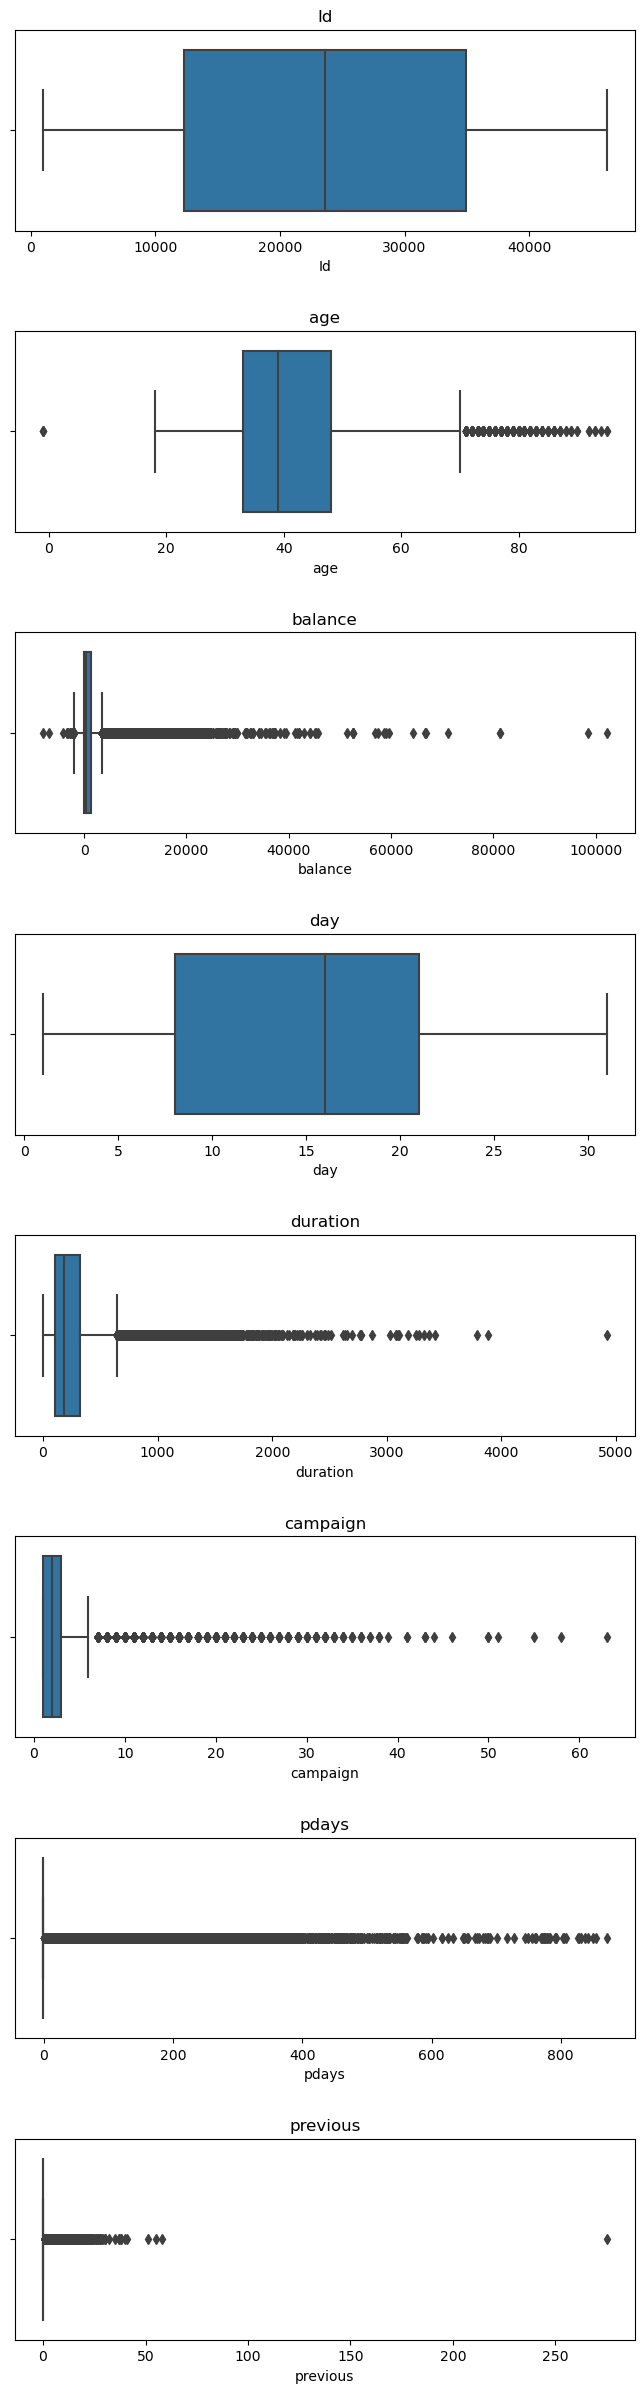

In [12]:
cols_num = ['Id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=8, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i]) # "boxplot" can allow us to see the outliers points
    ax[i].set_title(col)

**Observations:**

- 'previous': we have one extreme value in our dataset (close to 300).
- 'age': we are only considering people older than 18 years old.

In [13]:
print(f'Size of the dataset before eliminate the rows of previous: {data.shape}')
data = data[data['previous']<=100]
data = data[data['age']>=18] 
print(f'Size of the dataset after eliminate the rows of previous: {data.shape}')

Size of the dataset before eliminate the rows of previous: (45197, 18)
Size of the dataset after eliminate the rows of previous: (45193, 18)


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45193 non-null  int64  
 1   age        45193 non-null  float64
 2   job        45193 non-null  object 
 3   marital    45193 non-null  object 
 4   education  45193 non-null  object 
 5   default    45193 non-null  object 
 6   balance    45193 non-null  float64
 7   housing    45193 non-null  object 
 8   loan       45193 non-null  object 
 9   contact    45193 non-null  object 
 10  day        45193 non-null  int64  
 11  month      45193 non-null  object 
 12  duration   45193 non-null  int64  
 13  campaign   45193 non-null  int64  
 14  pdays      45193 non-null  int64  
 15  previous   45193 non-null  int64  
 16  poutcome   45193 non-null  object 
 17  y          45193 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


**Checking for typos of the categorical variables**


Let's check if we have typos in our categorical columns.

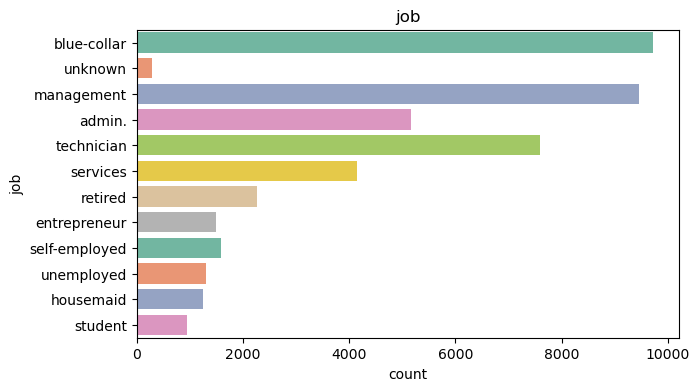

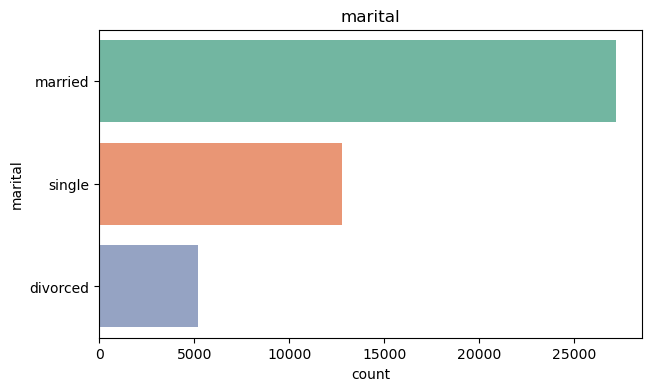

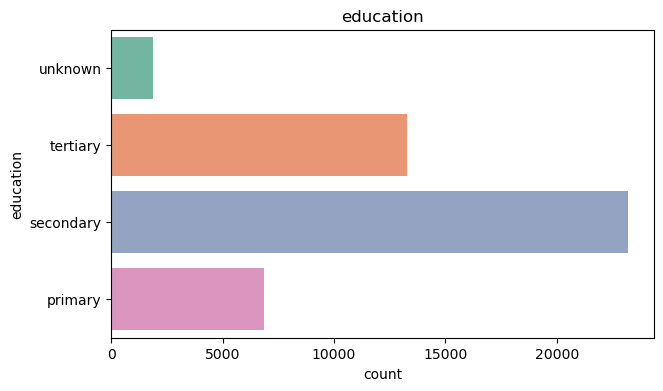

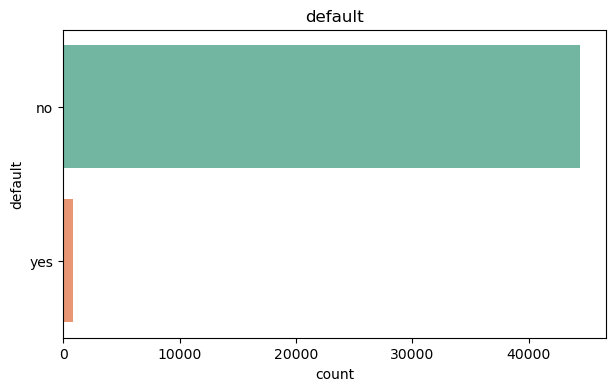

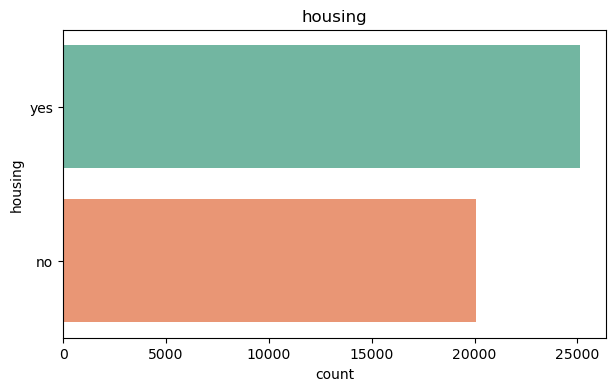

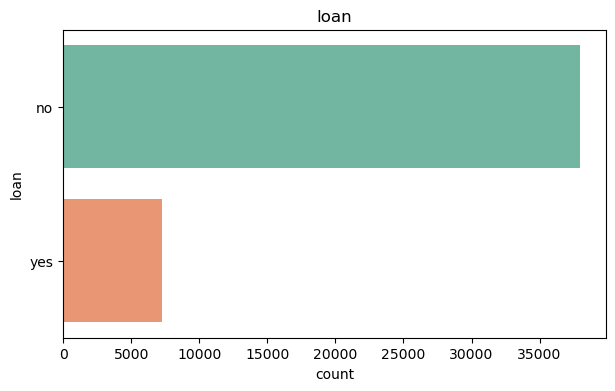

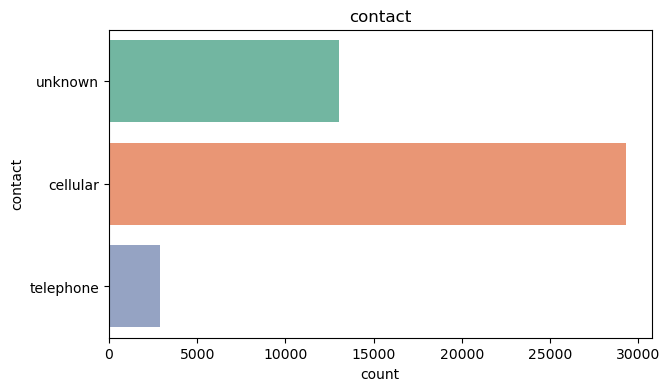

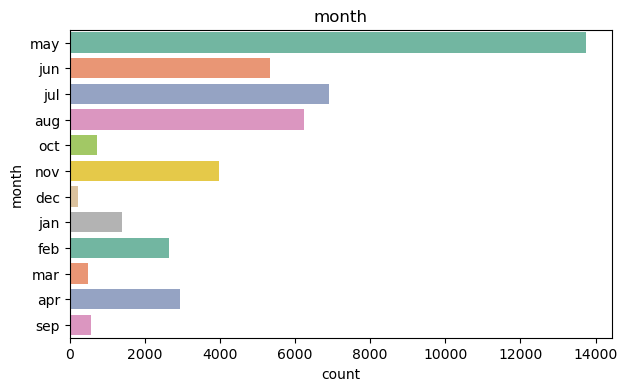

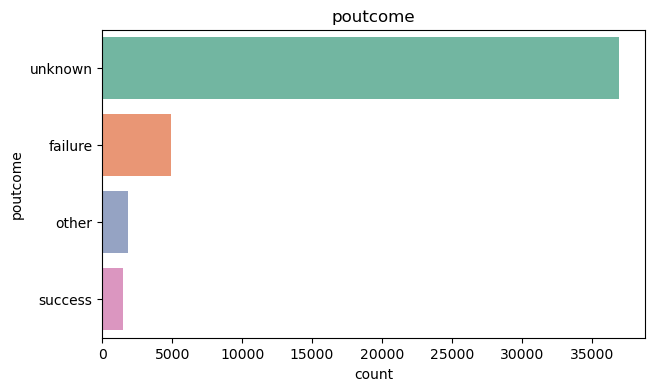

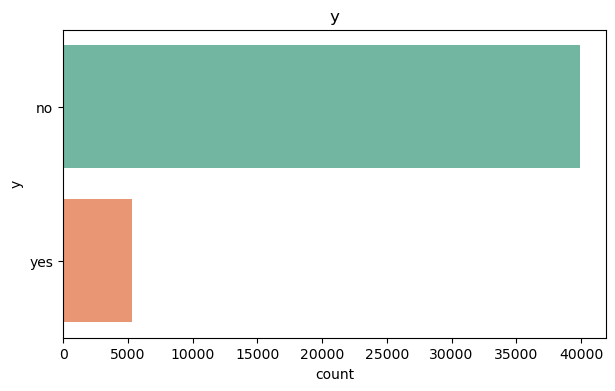

In [15]:
col_of_data = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

for i in col_of_data:
    plt.figure(figsize=(7,4))
    plt.title(i)
    sns.countplot(y=data[i], data = data, palette = 'Set2',hue_order=None)

We don't have any typos in our categorical columns!

In [16]:
data.shape

(45193, 18)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45193 entries, 3 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45193 non-null  int64  
 1   age        45193 non-null  float64
 2   job        45193 non-null  object 
 3   marital    45193 non-null  object 
 4   education  45193 non-null  object 
 5   default    45193 non-null  object 
 6   balance    45193 non-null  float64
 7   housing    45193 non-null  object 
 8   loan       45193 non-null  object 
 9   contact    45193 non-null  object 
 10  day        45193 non-null  int64  
 11  month      45193 non-null  object 
 12  duration   45193 non-null  int64  
 13  campaign   45193 non-null  int64  
 14  pdays      45193 non-null  int64  
 15  previous   45193 non-null  int64  
 16  poutcome   45193 non-null  object 
 17  y          45193 non-null  object 
dtypes: float64(2), int64(6), object(10)
memory usage: 6.6+ MB


We conclued that the dataset has been cleaned up and ready to be explored in our project.

In [18]:
path_clean_dataset = 'data_clean.csv'
data.to_csv(path_clean_dataset, index=False) 